In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset

In [2]:
df=pd.read_csv(r"C:\Users\Ibrahim Yousaf\OneDrive\Desktop\diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

# Exploratory Data Analysis

In [3]:
#Descriptive Statistics
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [4]:
#Infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
# Missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Histogram of Data Distribution

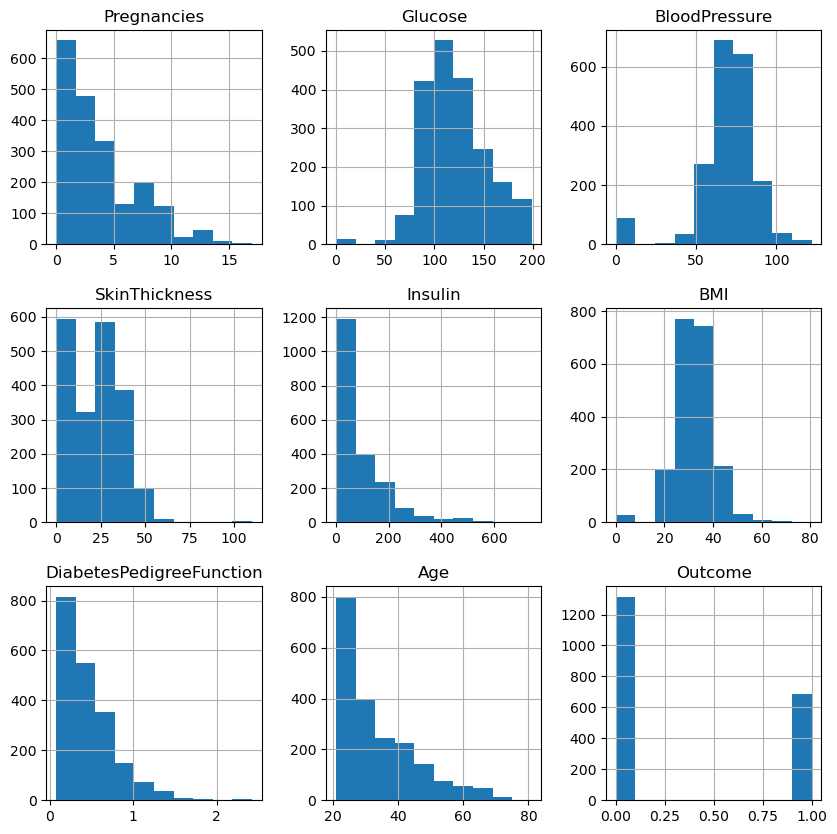

In [6]:
#Histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

## Corelation Matrix

<AxesSubplot:>

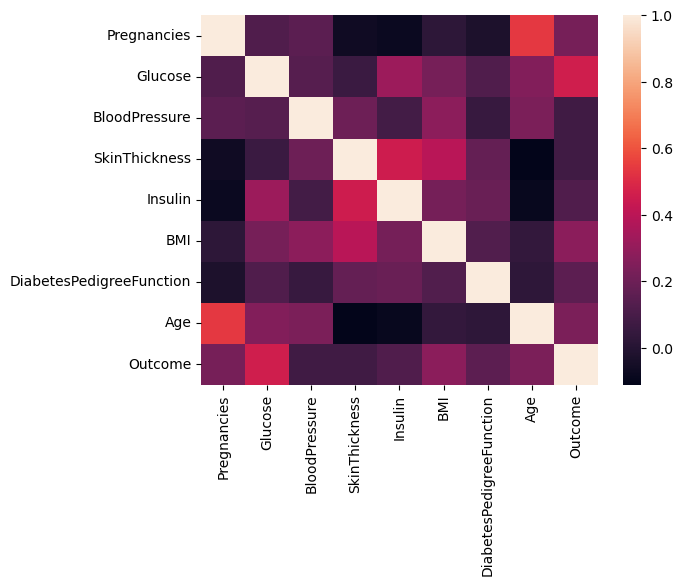

In [7]:
#Correlation matrix
sns.heatmap(df.corr())

## Data Distribution of Diabetic and Non-Diabetic Patients

<AxesSubplot:xlabel='count', ylabel='Outcome'>

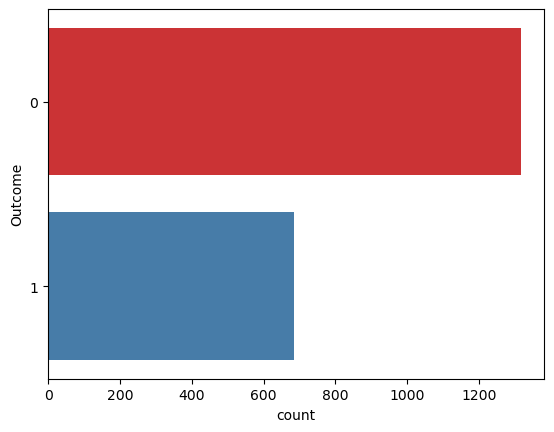

In [8]:
#Plot Graph of diabates and non diabetic patients 
#0 means no diabetes
#1 means patient with diabetes
sns.countplot(y=df['Outcome'],palette='Set1')

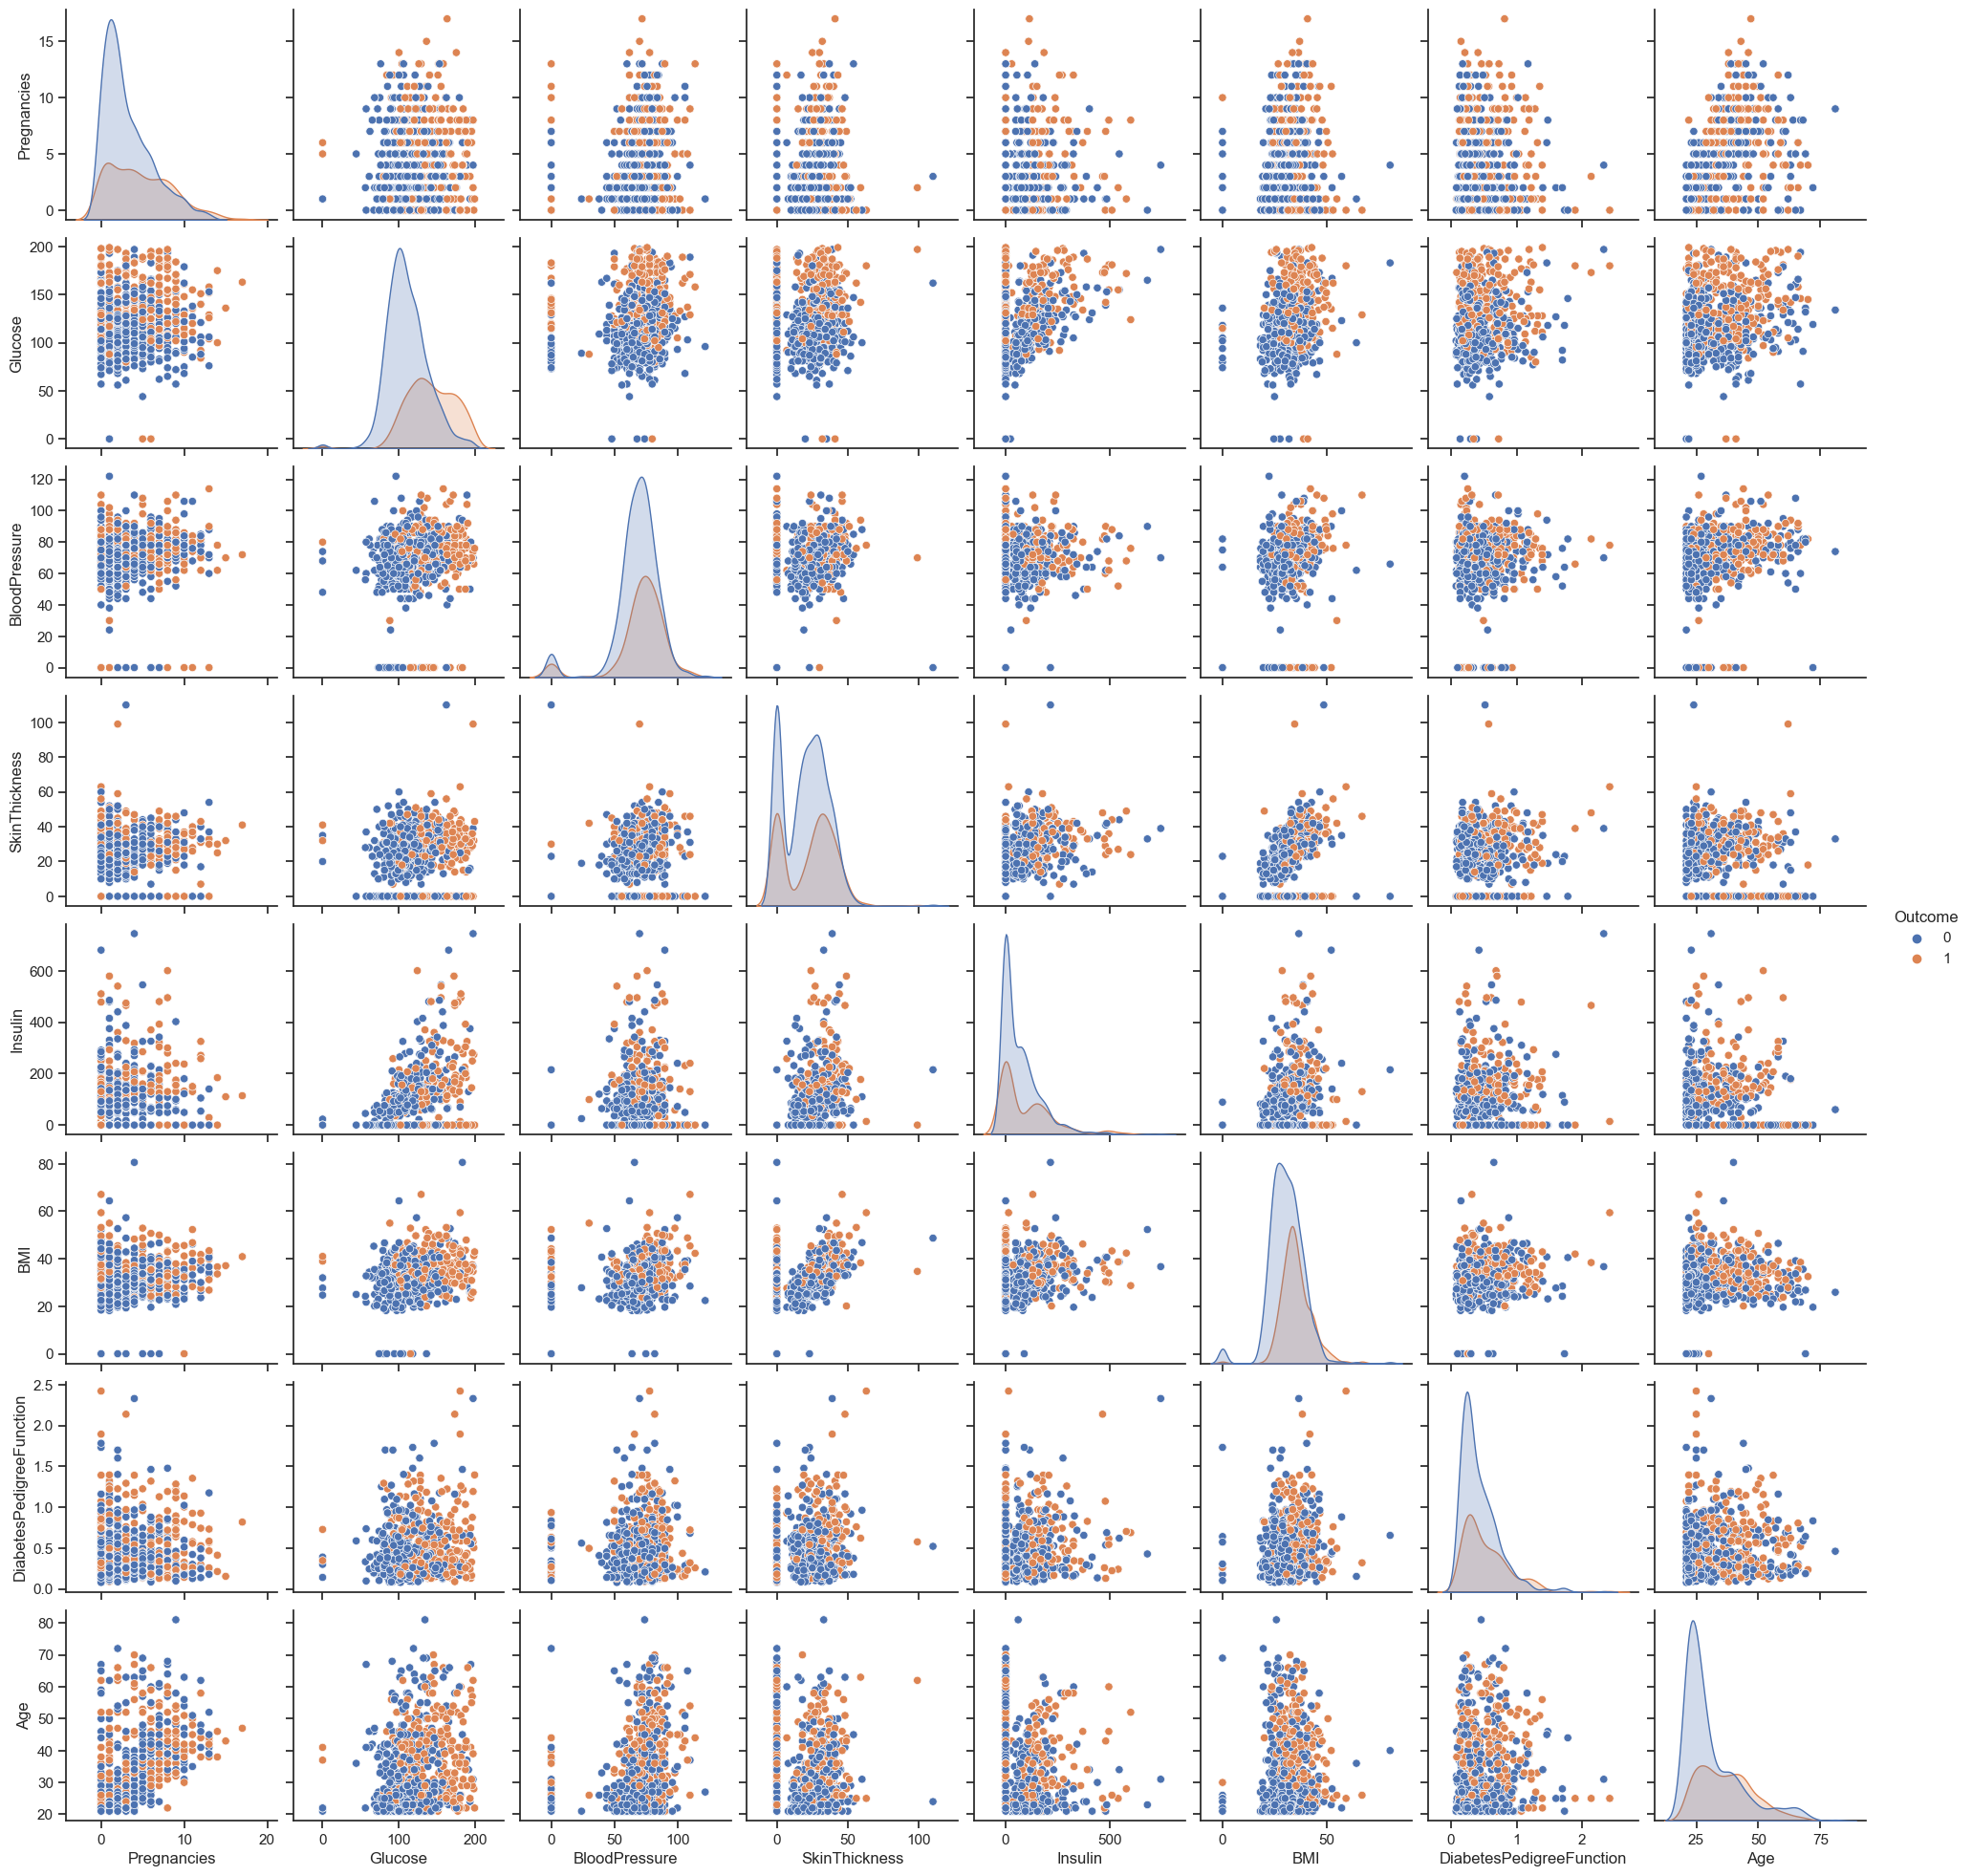

In [9]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

# Outliers

<AxesSubplot:>

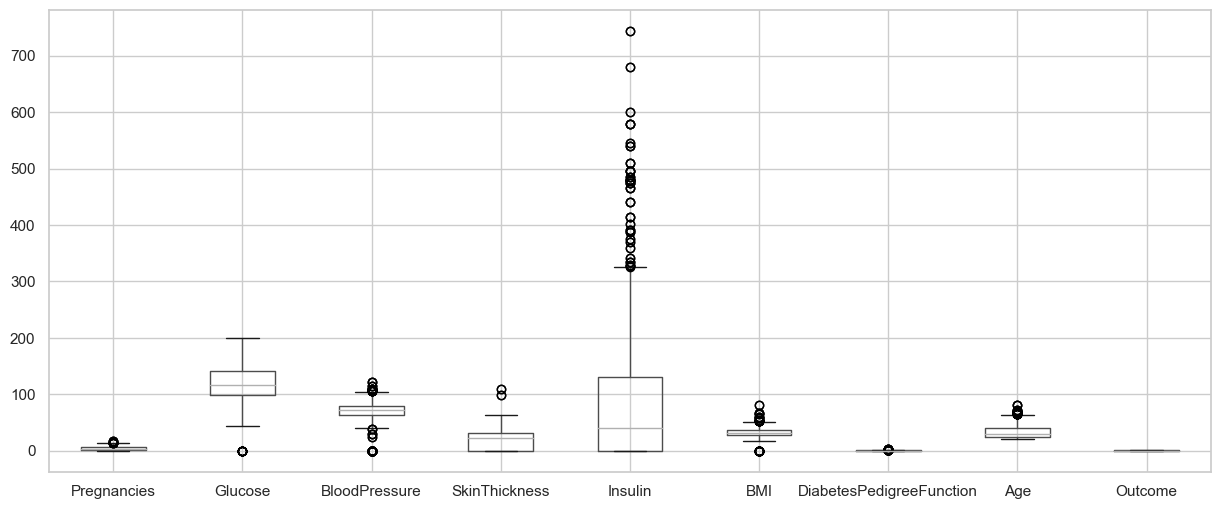

In [10]:
#Outliers
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

# Box plot for outliers

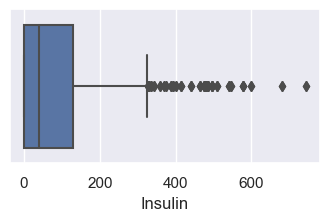

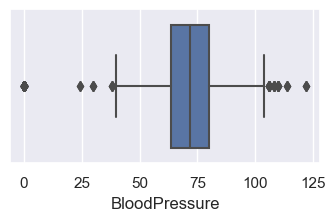

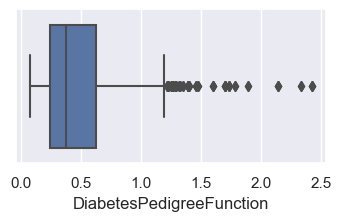

In [11]:
#Box PLot
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

## Removal of Outliers (To improve accuracy and for better learning)

In [12]:
#Remove Outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [13]:
#Removing the Outliers in the dataset
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((2000, 9), (1652, 9))

## Pair plot after removing outliers

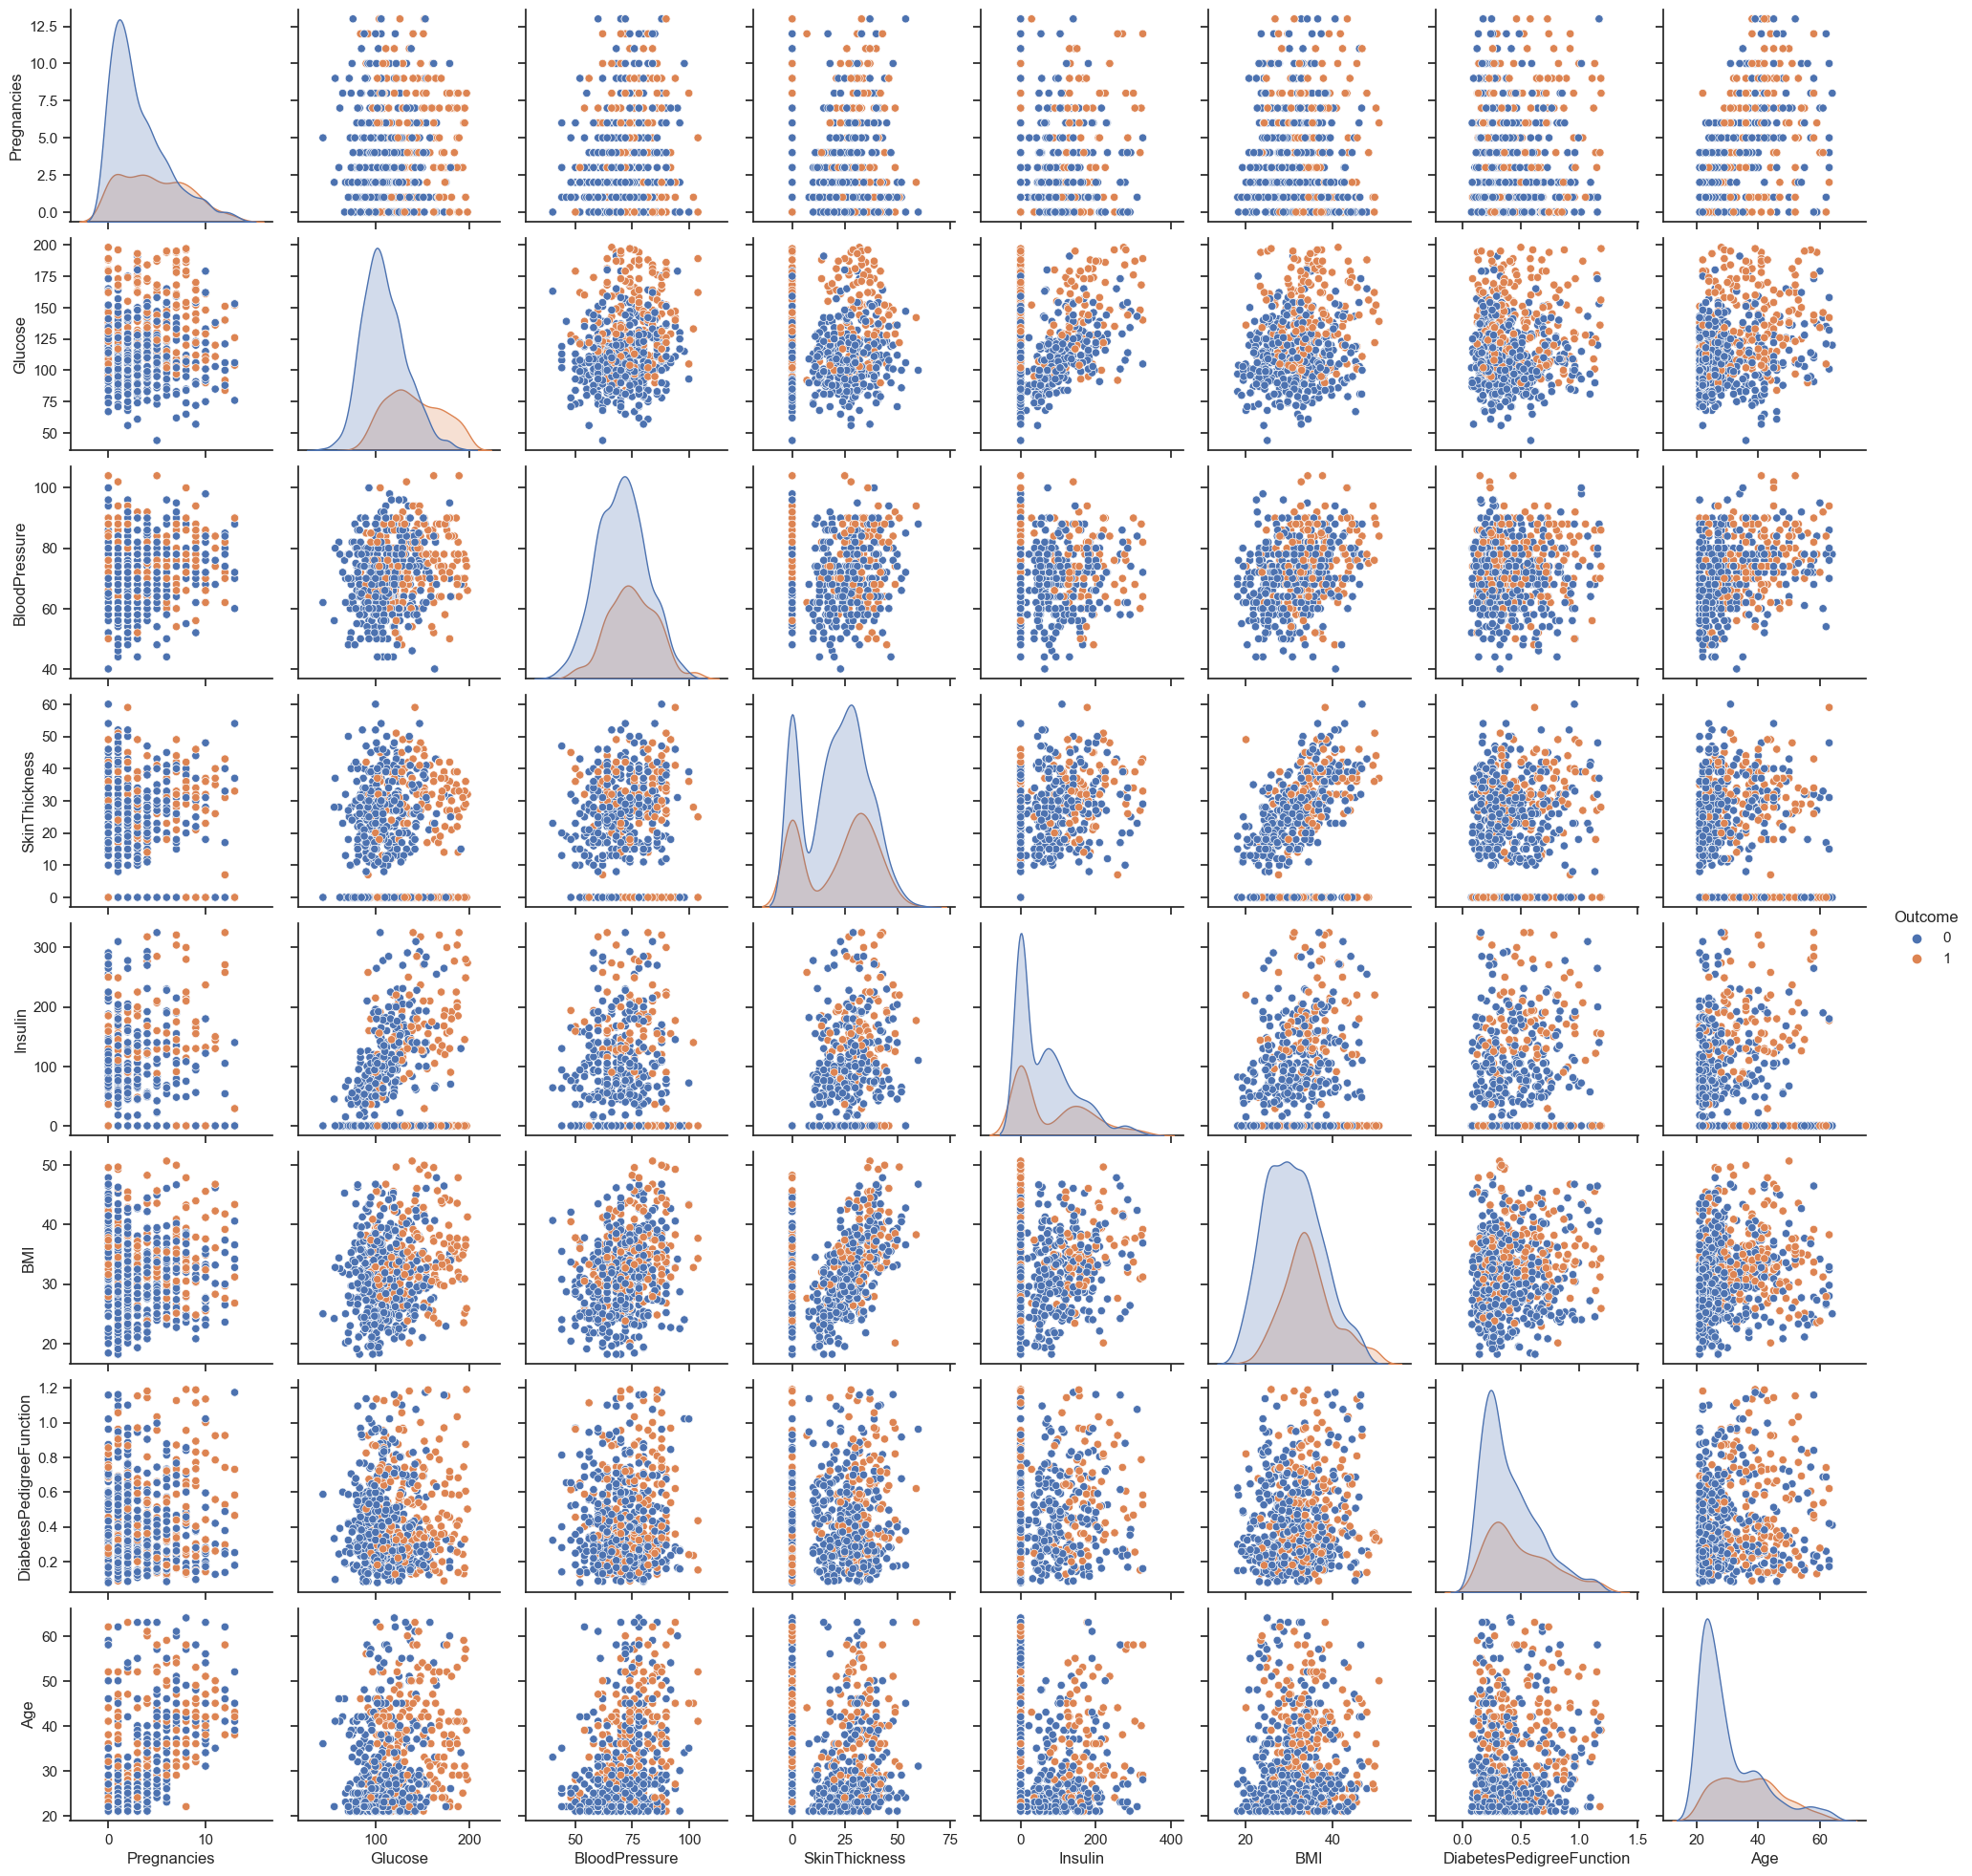

In [14]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

# Feature extraction

In [15]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

# Splitting data

In [16]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [17]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1321, 8), (331, 8), (1321,), (331,))

# Random Forest Model

In [18]:
# Initialize and fit the model
random_forest = RandomForestClassifier()
random_forest.fit(train_X, train_y)

# Predict
random_forest_pred = random_forest.predict(test_X)

# Evaluate
print(f'Random Forest Model:')
print(f'Accuracy: {accuracy_score(test_y, random_forest_pred)}')
print('Classification Report:')
print(classification_report(test_y, random_forest_pred))

Random Forest Model:
Accuracy: 0.9848942598187311
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       230
           1       1.00      0.95      0.97       101

    accuracy                           0.98       331
   macro avg       0.99      0.98      0.98       331
weighted avg       0.99      0.98      0.98       331



# Decision Tree Model

In [19]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

# Predict
decision_tree_pred = decision_tree.predict(test_X)

# Evaluate
print(f'Decision Tree Model:')
print(f'Accuracy: {accuracy_score(test_y, decision_tree_pred)}')
print('Classification Report:')
print(classification_report(test_y, decision_tree_pred))

Decision Tree Model:
Accuracy: 0.9788519637462235
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       230
           1       0.98      0.95      0.96       101

    accuracy                           0.98       331
   macro avg       0.98      0.97      0.97       331
weighted avg       0.98      0.98      0.98       331

